In [2]:
%matplotlib inline

import pydicom as pyd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

In [3]:
dcm_file_name_template = '/media/tx-deepocean/Data/dataset/frature/厚胸数据/ZDYFT2418860T100/ZDYFT2418860T100_{:03d}.dcm'
window_center = 300
window_width = 1500
lungwin = np.array([window_center - window_width // 2., window_center + window_width // 2])

In [4]:
def read_dcm_image(idx):
    dcm = pyd.dcmread(dcm_file_name_template.format(idx))
    
    intercept = dcm.RescaleIntercept
    slope = dcm.RescaleSlope
    img = dcm.pixel_array.astype(np.float64) * slope
    img = img.astype(np.int16) + intercept
    newimg = (img - lungwin[0]) / (lungwin[1] - lungwin[0])
    newimg[newimg < 0] = 0
    newimg[newimg > 1] = 1
    newimg = (newimg * 255).astype('uint8')
    return newimg

def display(img):
    plt.imshow(img, cmap='gray')

do_canny = partial(cv2.Canny, threshold1=100, threshold2=300)

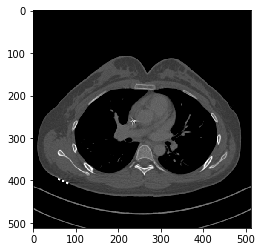

In [5]:
img = read_dcm_image(126)
display(img)

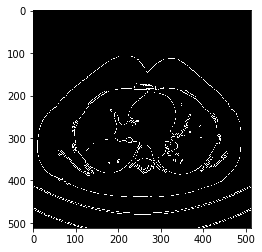

In [6]:
edge = do_canny(img)
display(edge)

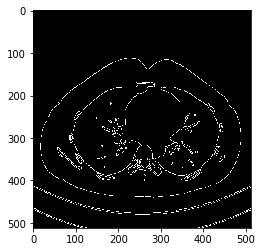

In [8]:
display(do_canny(read_dcm_image(142)))